## Projeto Udemy - Curso Data Science Course Bootcamp 2022 

<p> Projeto - Seção 44: TensorFlow 2.0</p>

Link: https://www.udemy.com/course/the-data-science-course-complete-data-science-bootcamp/learn/lecture/10784318?start=1#overview

### 1. Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
obs = 1000

x1 = np.random.uniform(-10,10,(obs,1))
x2 = np.random.uniform(-10,10,(obs,1))
inputs = np.column_stack((x1,x2))

epsilon = np.random.uniform(-1,1, (obs,1))
y = 2*x1 - 3*x2 + 5 + epsilon

np.savez("TF_intro", input=inputs, target=y)

### 2. Etapas de modelagem dos dados com TF
1. Carregar os dados.
2. Criar o modelo (tf.keras.Sequential, no caso para uma regressão linear).
3. Objective Function (no caso, MSE ou L2-Norm).
4. Otimização do algoritmo (no caso, Stochastic Gradient Descent (SGD)).

In [3]:
training_data = np.load('TF_intro.npz')
print(training_data)

In [4]:
input_size = 2 #2 variáveis explicativas
output_size = 1 #1 variável dependente

model = tf.keras.Sequential([
                            tf.keras.layers.Dense(output_size)
                            ])
model.compile(optimizer='sgd', loss='mean_squared_error') #o modelo vai ser criado utilizando 
#Stochastic Gradient Descent (SGD) e função perda de L2 ou mean-squared-error (MSE)

#Epoch = iterações ao longo de todo o dataset
model.fit(training_data['input'],training_data['target'], epochs=100, verbose=1)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 36.2216
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.7140
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 1.5575
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6932
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.4385
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3699
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3442
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3488
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3505
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3417
Epoch 11/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3420
Epoch 12/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3418
Epoch 13/100
32/32 [================

In [5]:
#Mostras os pesos e os vieses

model.layers[0].get_weights()

[array([[ 1.9726677],
        [-3.00358  ]], dtype=float32),
 array([5.0068493], dtype=float32)]

In [6]:
model.predict_on_batch(training_data['input'])

array([[-4.01075077e+00],
       [-3.23614044e+01],
       [ 1.16031942e+01],
       [ 3.34110298e+01],
       [-1.69064789e+01],
       [-1.97666035e+01],
       [ 9.91791916e+00],
       [ 1.56877985e+01],
       [-3.47543182e+01],
       [ 3.01225643e+01],
       [ 4.62416458e+00],
       [ 1.25725222e+01],
       [-6.38142967e+00],
       [-2.69039135e+01],
       [ 3.24137878e+00],
       [ 5.36008263e+00],
       [ 1.15955238e+01],
       [-9.49556732e+00],
       [ 3.24624634e+01],
       [-1.97623863e+01],
       [-4.26006031e+00],
       [ 2.84403858e+01],
       [-1.36998692e+01],
       [-1.33214493e+01],
       [ 1.52403984e+01],
       [ 3.20053596e+01],
       [ 2.00099220e+01],
       [ 1.90631142e+01],
       [ 3.94649696e+00],
       [ 2.29854336e+01],
       [-4.27337265e+00],
       [-1.31498337e-01],
       [ 3.52440720e+01],
       [ 1.84159317e+01],
       [ 1.60550537e+01],
       [-1.33627796e+01],
       [-3.77209854e+00],
       [ 1.14989843e+01],
       [ 2.4

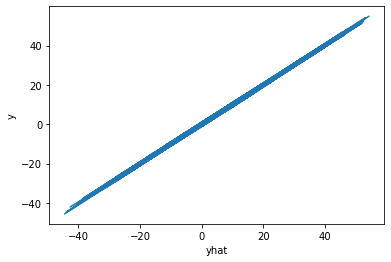

In [10]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['input'])), np.squeeze(training_data['target']))
plt.xlabel('yhat')
plt.ylabel('y')
plt.show()